# Car Resale Dataset - Multiple Linear Regression

We load the preprocessed dataset and apply the Multiple Linear Regression technique to predict the resale price of a car, given its features.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Car Resale Dataset/Preprocessed_data.csv')
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Price
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,17.74


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6019 non-null   float64
 3   Engine                     6019 non-null   float64
 4   Power                      6019 non-null   float64
 5   Seats                      6019 non-null   float64
 6   Location_Bangalore         6019 non-null   int64  
 7   Location_Chennai           6019 non-null   int64  
 8   Location_Coimbatore        6019 non-null   int64  
 9   Location_Delhi             6019 non-null   int64  
 10  Location_Hyderabad         6019 non-null   int64  
 11  Location_Jaipur            6019 non-null   int64  
 12  Location_Kochi             6019 non-null   int64  
 13  Location_Kolkata           6019 non-null   int64

### Error Correction

In [4]:
data.drop(['Fuel_Type_Electric', 'Brand_Audi', 'Brand_Force', 'Brand_Lamborghini', 'Brand_Smart'], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6019 non-null   float64
 3   Engine                     6019 non-null   float64
 4   Power                      6019 non-null   float64
 5   Seats                      6019 non-null   float64
 6   Location_Bangalore         6019 non-null   int64  
 7   Location_Chennai           6019 non-null   int64  
 8   Location_Coimbatore        6019 non-null   int64  
 9   Location_Delhi             6019 non-null   int64  
 10  Location_Hyderabad         6019 non-null   int64  
 11  Location_Jaipur            6019 non-null   int64  
 12  Location_Kochi             6019 non-null   int64  
 13  Location_Kolkata           6019 non-null   int64

In [6]:
data.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Ford                   0
Brand_Honda                  0
Brand_Hyundai                0
Brand_ISUZU                  0
Brand_Is


Split the data into train and test sets:

In [7]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## Multiple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x, y)

LinearRegression()

## Test Data Preprocessing

In [10]:
test_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Car Resale Dataset/test-data.csv')
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [11]:
test_data.drop('Unnamed: 0', axis = 1, inplace = True)
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


We have to do preprocessing on the test dataset:

In [12]:
test_data['Brand'] = test_data['Name'].apply(lambda x:x.split()[0])
test_data.drop('Name', axis=1, inplace=True)
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,Hyundai


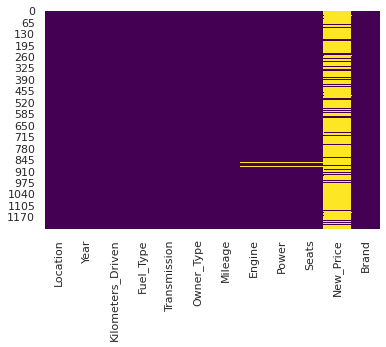

In [13]:
import seaborn as sns
sns.set()
sns.heatmap(test_data.isnull(), cmap='viridis', cbar=False)

Just as in training dataset, we have to drop *New_Price* column:

In [14]:
test_data.drop('New_Price', axis = 1, inplace = True)
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai


Check the datatype and the missing values:

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1234 non-null   object 
 1   Year               1234 non-null   int64  
 2   Kilometers_Driven  1234 non-null   int64  
 3   Fuel_Type          1234 non-null   object 
 4   Transmission       1234 non-null   object 
 5   Owner_Type         1234 non-null   object 
 6   Mileage            1234 non-null   object 
 7   Engine             1224 non-null   object 
 8   Power              1224 non-null   object 
 9   Seats              1223 non-null   float64
 10  Brand              1234 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


There are missing values that we have to handle in the columns *Engine, Power and Seats*.

We first have to remove the units of Mileage, Engine and Power:


In [16]:
test_data['Engine'].unique()

array(['998 CC', '796 CC', '2393 CC', '1364 CC', '1197 CC', '2179 CC',
       '2982 CC', '814 CC', '1497 CC', '1968 CC', '1794 CC', '1248 CC',
       '1598 CC', '1995 CC', '1399 CC', '1298 CC', '1198 CC', nan,
       '1799 CC', '1299 CC', '1498 CC', '1086 CC', '2835 CC', '1591 CC',
       '2494 CC', '1373 CC', '2143 CC', '2953 CC', '1396 CC', '1798 CC',
       '1199 CC', '1196 CC', '1461 CC', '2487 CC', '1582 CC', '2496 CC',
       '1368 CC', '1596 CC', '1595 CC', '2354 CC', '624 CC', '2993 CC',
       '936 CC', '2987 CC', '1999 CC', '999 CC', '2000 CC', '1493 CC',
       '1120 CC', '3498 CC', '1496 CC', '1405 CC', '1896 CC', '2967 CC',
       '2477 CC', '1948 CC', '1172 CC', '1797 CC', '2498 CC', '1061 CC',
       '1150 CC', '1495 CC', '2499 CC', '1796 CC', '2362 CC', '2523 CC',
       '5998 CC', '2755 CC', '2400 CC', '2349 CC', '995 CC', '1998 CC',
       '2999 CC', '1795 CC', '1984 CC', '793 CC', '1341 CC', '1186 CC',
       '1499 CC', '1991 CC', '799 CC', '1586 CC', '2497 CC', '195

In [17]:
test_data['Power'].unique()

array(['58.2 bhp', '47.3 bhp', '147.8 bhp', 'null bhp', '82.85 bhp',
       '140 bhp', '168.7 bhp', '55.2 bhp', '118 bhp', '167.6 bhp',
       '82 bhp', '125 bhp', '75 bhp', '102.5 bhp', '184 bhp', '68 bhp',
       '81.80 bhp', '85.8 bhp', '73.94 bhp', nan, '132 bhp', '70 bhp',
       '46.3 bhp', '98.6 bhp', '103.52 bhp', '80 bhp', '67.06 bhp',
       '103.6 bhp', '68.05 bhp', '107.2 bhp', '74 bhp', '121.3 bhp',
       '102 bhp', '190 bhp', '174.33 bhp', '88.5 bhp', '91.1 bhp',
       '136 bhp', '100.6 bhp', '89.84 bhp', '153.86 bhp', '174.3 bhp',
       '67.04 bhp', '69 bhp', '78 bhp', '138.1 bhp', '81.83 bhp',
       '88.8 bhp', '67 bhp', '82.5 bhp', '120 bhp', '108.62 bhp',
       '67.1 bhp', '86.8 bhp', '93.7 bhp', '62 bhp', '84 bhp', '79.4 bhp',
       '63.1 bhp', '100 bhp', '81.86 bhp', '175.67 bhp', '87.2 bhp',
       '126.32 bhp', '103.2 bhp', '179.5 bhp', '88.76 bhp', '99.6 bhp',
       '120.7 bhp', '62.1 bhp', '83.1 bhp', '180 bhp', '75.94 bhp',
       '126.24 bhp', '35 bhp',

In [18]:
test_data['Mileage'].unique()

array(['32.26 km/kg', '24.7 kmpl', '13.68 kmpl', '23.59 kmpl',
       '18.5 kmpl', '16.0 kmpl', '12.55 kmpl', '21.1 kmpl', '17.0 kmpl',
       '15.1 kmpl', '12.8 kmpl', '18.9 kmpl', '13.4 kmpl', '17.8 kmpl',
       '13.24 kmpl', '17.05 kmpl', '19.59 kmpl', '13.8 kmpl', '22.0 kmpl',
       '17.5 kmpl', '23.2 kmpl', '18.06 kmpl', '15.5 kmpl', '19.7 kmpl',
       '27.3 kmpl', '21.66 kmpl', '15.11 kmpl', '19.81 kmpl', '10.5 kmpl',
       '23.4 kmpl', '19.1 kmpl', '14.84 kmpl', '15.29 kmpl', '22.48 kmpl',
       '27.39 kmpl', '17.11 kmpl', '16.55 kmpl', '15.41 kmpl',
       '24.52 kmpl', '20.73 kmpl', '20.0 kmpl', '12.99 kmpl',
       '18.88 kmpl', '22.7 kmpl', '11.4 kmpl', '14.16 kmpl', '17.01 kmpl',
       '24.3 kmpl', '19.09 kmpl', '17.7 kmpl', '14.53 kmpl', '18.6 kmpl',
       '20.14 kmpl', '23.0 kmpl', '18.2 kmpl', '15.4 kmpl', '18.4 kmpl',
       '16.02 kmpl', '0.0 kmpl', '18.16 kmpl', '23.84 kmpl', '23.08 kmpl',
       '18.12 kmpl', '19.16 kmpl', '21.43 kmpl', '22.32 kmpl',
       '2

In [19]:
test_data['Mileage'] = test_data['Mileage'].str.replace('km/kg', '')
test_data['Mileage'] = test_data['Mileage'].str.replace('kmpl', '')
test_data['Engine'] = test_data['Engine'].str.replace('CC', '')
test_data['Power'] = test_data['Power'].str.replace('bhp', '')
test_data['Power'] = test_data['Power'].str.replace('null', '0')

We convert the values of these columns into float:

In [20]:
test_data['Mileage'] = test_data['Mileage'].astype(float)
test_data['Engine'] = test_data['Engine'].astype(float)
test_data['Power'] = test_data['Power'].astype(float)

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1234 non-null   object 
 1   Year               1234 non-null   int64  
 2   Kilometers_Driven  1234 non-null   int64  
 3   Fuel_Type          1234 non-null   object 
 4   Transmission       1234 non-null   object 
 5   Owner_Type         1234 non-null   object 
 6   Mileage            1234 non-null   float64
 7   Engine             1224 non-null   float64
 8   Power              1224 non-null   float64
 9   Seats              1223 non-null   float64
 10  Brand              1234 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


We now handle the missing values:

In [22]:
test_data['Engine'] = test_data['Engine'].fillna(test_data['Engine'].mean())
test_data['Power'] = test_data['Power'].fillna(test_data['Power'].mean())
test_data['Seats'] = test_data['Seats'].fillna(test_data['Seats'].mode()[0])

In [23]:
test_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
dtype: int64

Perfect.

Now, we use pandas' *get_dummies* to convert the categorical variables:

In [24]:
data_dummies = pd.get_dummies(test_data[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand']], drop_first = True)
data_dummies.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Mitsubishi,Brand_Nissan,Brand_OpelCorsa,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test_data_dummies = pd.concat([test_data, data_dummies], axis = 1)
test_data_dummies.drop(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Brand_Hindustan', 'Brand_OpelCorsa'], axis = 1, inplace = True)
test_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1234 non-null   int64  
 1   Kilometers_Driven          1234 non-null   int64  
 2   Mileage                    1234 non-null   float64
 3   Engine                     1234 non-null   float64
 4   Power                      1234 non-null   float64
 5   Seats                      1234 non-null   float64
 6   Location_Bangalore         1234 non-null   uint8  
 7   Location_Chennai           1234 non-null   uint8  
 8   Location_Coimbatore        1234 non-null   uint8  
 9   Location_Delhi             1234 non-null   uint8  
 10  Location_Hyderabad         1234 non-null   uint8  
 11  Location_Jaipur            1234 non-null   uint8  
 12  Location_Kochi             1234 non-null   uint8  
 13  Location_Kolkata           1234 non-null   uint8

We have now completed Preprocessing of the testing dataset.

## Multiple Linear Regression - Prediction

If we predict the test data directly, an error will pop up indicating the number of features:

In [26]:
x_test = test_data_dummies.copy()
x_test = x_test.values
x_test

array([[2.0140e+03, 4.0929e+04, 3.2260e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 5.4493e+04, 2.4700e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 3.4000e+04, 1.3680e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0120e+03, 2.8000e+04, 2.3080e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 5.2262e+04, 1.7200e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0140e+03, 7.2443e+04, 1.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [27]:
data.columns.values

array(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo', 'Price'], dtype=object)

In [28]:
test_data_dummies.columns.values

array(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'], dtype=object)

### Error Correction Loop

```
remove = []
for x in test_data_dummies.columns:
  if x not in data.columns.values:
    remove.append(x)
```



In [29]:
y_pred = regression.predict(x_test)

We cannot use performance measurements, since we do not have the Price in the testing dataset but we can check the score:

In [30]:
regression.score(x,y)

0.7644315200354692

There is a good $R^{2}$ score for this dataset.